In these first 5 cells I dowload a dataset I made public on Kaggle called "Top 10 MLB players based on WAR 2010-2019"



*   This dataframe contains the top 10 players for each season based on Wins Above Replacement



In [ ]:
!pip install kaggle

In [ ]:
import json
token = {'username':'marioferretti','key':'410720b4e9e7dc5292fa04509702ba3f'}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d marioferretti/top-10-mlb-players-based-on-war-20102019 -p /content

top-10-mlb-players-based-on-war-20102019.zip: Skipping, found more recently modified local copy (use --force to force download)


Here I display the entire dataframe; the data contains the Top 10 players of each season in the MLB based on WAR from 2010-2019. 

Stats included:
*   Batting Average, wRC+, WAR, OBP, Slugging%






In [81]:
import pandas as pd
import requests
from io import StringIO 

df = pd.read_csv('FPD2.csv') 
# personal note, df stands for data frame
pd.set_option("display.max_rows", None, "display.max_columns", None) 
print(df)

df.rename(columns = {'wRC+':'wRC'}, inplace = True)
# print("\nAfter modifying first column:\n", df.columns)



    Year               Name League  Games    AVG  wRC+   WAR    OBP    SLG
0   2019         Mike Trout     AL    134  0.291   180   8.6  0.438  0.645
1   2019       Alex Bregman     AL    156  0.296   168   8.5  0.423  0.592
2   2019   Christian Yelich     NL    130  0.329   174   7.8  0.429  0.671
3   2019     Cody Bellinger     NL    156  0.305   162   7.8  0.406  0.629
4   2019      Marcus Semien     AL    162  0.285   137   7.6  0.369  0.522
5   2019        Ketel Marte     NL    144  0.329   150   7.1  0.389  0.592
6   2019     Anthony Rendon     AL    146  0.319   154   7.0  0.412  0.598
7   2019    Xander Bogaerts     AL    155  0.309   141   6.8  0.384  0.555
8   2019       Mookie Betts     AL    150  0.295   135   6.6  0.391  0.524
9   2019    George Springer     AL    122  0.292   156   6.5  0.383  0.591
10  2018       Mookie Betts     AL    136  0.346   185  10.4  0.438  0.640
11  2018         Mike Trout     AL    140  0.312   190   9.8  0.460  0.628
12  2018       Jose Ramir

Here I create a few things:

*   Pivot table displaying the On-base Percentage for top 10 players from 2010-2019 in both the American and National League.
*   Timeplot of the pivot table representing the year-to-year change of OBP.

*   Lastly, commented out are 3 pivot tables(1 for WAR, 1 for wRC+, 1 for Games). If wanted, simply uncomment lines 6-17 and run again. 





League        AL        NL
Year                      
2010    0.402333  0.390250
2011    0.406857  0.423333
2012    0.382500  0.389833
2013    0.407000  0.367333
2014    0.388250  0.374833
2015    0.373250  0.411500
2016    0.376714  0.370667
2017    0.412000  0.408667
2018    0.398429  0.381000
2019    0.400000  0.408000


Text(0, 0.5, 'On-base Percentage')

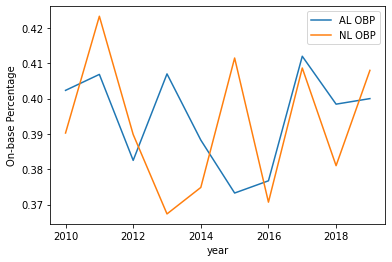

In [ ]:
!pip install gapminder
from gapminder import gapminder
import math
import matplotlib.pyplot as plt

# WAR_pt=pd.pivot_table(df, values='WAR',
#                       index=['Year'],
#                       columns='League')
# print(WAR_pt)
# wRC_pt=pd.pivot_table(df, values='wRC',
#                       index=['Year'],
#                       columns='League')
# print(wRC_pt)
# Games_pt=pd.pivot_table(df, values='Games',
#                       index=['Year'],
#                       columns='League')
# print(Games_pt)

OBP_pt=pd.pivot_table(df, values='OBP',
                      index=['Year'],
                      columns='League')
print(OBP_pt)

plt.plot(OBP_pt['AL'], label='AL OBP')
plt.plot(OBP_pt['NL'], label='NL OBP')
plt.legend(loc='best')
plt.xlabel('year')
plt.ylabel('On-base Percentage')



In the following cell a couple of things were done:



1.   A pivot table was created to display the Batting Average of top 10 players from 2010-2019 in both the American and National League.
2.   A timeplot of the pivot table is graphed to show the year-to-year change of Batting Average.





League        AL        NL
Year                      
2010    0.310000  0.303000
2011    0.299143  0.308667
2012    0.322500  0.314833
2013    0.314500  0.302000
2014    0.306000  0.297500
2015    0.297250  0.312167
2016    0.302143  0.296000
2017    0.313500  0.305667
2018    0.299857  0.310333
2019    0.298143  0.321000


Text(0, 0.5, 'Batting Average')

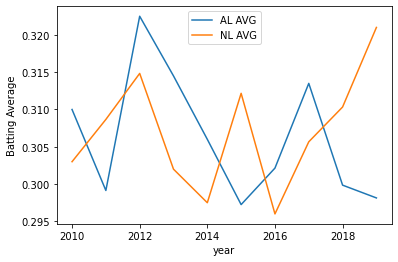

In [ ]:
avg_pt=pd.pivot_table(df, values='AVG',
                      index=['Year'],
                      columns='League')
print(avg_pt)

plt.plot(avg_pt['AL'], label='AL AVG')
plt.plot(avg_pt['NL'], label='NL AVG')
plt.legend(loc='best')
plt.xlabel('year')
plt.ylabel('Batting Average')

Similar to the previous cell, I created:
1.   A pivot table to display the Slugging% of top 10 players from 2010-2019 in both the American and National League.
2.   A timeplot of the pivot table to show the year-to-year change of Slugging%.

League        AL        NL
Year                      
2010    0.581167  0.598750
2011    0.570571  0.560333
2012    0.570250  0.531333
2013    0.581500  0.479500
2014    0.520750  0.500333
2015    0.534250  0.536000
2016    0.539429  0.500000
2017    0.596500  0.566667
2018    0.572571  0.557000
2019    0.575286  0.630667


Text(0, 0.5, 'Slugging %')

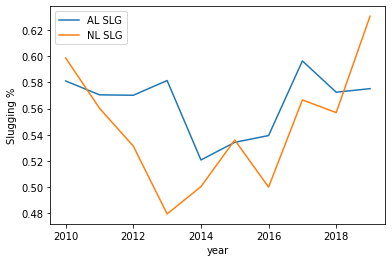

In [ ]:
SLG_pt=pd.pivot_table(df, values='SLG',
                      index=['Year'],
                      columns='League')
print(SLG_pt)

plt.plot(SLG_pt['AL'], label='AL SLG')
plt.plot(SLG_pt['NL'], label='NL SLG')
plt.legend(loc='best')
plt.xlabel('year')
plt.ylabel('Slugging %')

Here I breakdown my previous dataframe into 10 different dataframes, each represeting a specific year. 

I then apply the describe function to summarize the central tendency, dispersion and shape of each year's newly created dataframe.


*   Note: Years 2010-2018 are commented out, if wanted one can simply uncomment lines 5-39.




In [ ]:
# 2019
df_19=df[df['Year']==2019]
print(df_19.describe())
# # 2018
# df_18=df[df['Year']==2018]
# # print(df_18.head())
# print(df_18.describe())
# # 2017
# df_17=df[df['Year']==2017]
# # print(df_17.head())
# print(df_17.describe())
# # 2016
# df_16=df[df['Year']==2016]
# # print(df_16.head())
# print(df_16.describe())
# # 2015
# df_15=df[df['Year']==2015]
# # print(df_15.head())
# print(df_15.describe())
# # 2014
# df_14=df[df['Year']==2014]
# # print(df_14.head())
# print(df_14.describe())
# # 2013
# df_13=df[df['Year']==2013]
# # print(df_13.head())
# print(df_13.describe())
# # 2012
# df_12=df[df['Year']==2012]
# # print(df_12.head())
# print(df_12.describe())
# # 2011
# df_11=df[df['Year']==2011]
# # print(df_11.head())
# print(df_11.describe())
# # 2010
# df_10=df[df['Year']==2010]
# # print(df_10.head())
# print(df_10.describe())

         Year       Games        AVG         wRC        WAR        OBP  \
count    10.0   10.000000  10.000000   10.000000  10.000000  10.000000   
mean   2019.0  145.500000   0.305000  155.700000   7.430000   0.402400   
std       0.0   13.040535   0.016021   15.442006   0.749889   0.022717   
min    2019.0  122.000000   0.285000  135.000000   6.500000   0.369000   
25%    2019.0  136.500000   0.292750  143.250000   6.850000   0.385250   
50%    2019.0  148.000000   0.300500  155.000000   7.350000   0.398500   
75%    2019.0  155.750000   0.316500  166.500000   7.800000   0.420250   
max    2019.0  162.000000   0.329000  180.000000   8.600000   0.438000   

             SLG  
count  10.000000  
mean    0.591900  
std     0.048704  
min     0.522000  
25%     0.564000  
50%     0.592000  
75%     0.621250  
max     0.671000  


Lastly, I create a new dataframe that holds the means of Games, BA, wRC+, and WAR from the original dataframe.


*   With this, one can get an idea of what the average top 10 player from 2010-2019 for a given year performed like. 
*   Using this, a team can get a better idea of what to expect from a Top 10 player when looking to sign a player of that caliber. 



In [ ]:
# !pip install gapminder
from gapminder import gapminder
import math
import matplotlib.pyplot as plt

df2=pd.DataFrame({'Year': [2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010],
                  'Games': [145.5, 148.8, 148.0, 156.4, 154.7, 150.8, 151.5, 153.1, 152.8, 150.7],
                  'AVG': [0.305, 0.303, 0.308, 0.300, 0.306, 0.301, 0.307, 0.318, 0.302, 0.307],
                  'wRC': [155.7, 156.0, 156.0, 141.5, 152.4, 148.6, 149.7, 152.9, 151.1, 149.6],
                  'WAR': [7.43, 7.59, 6.92, 7.28, 7.42, 6.90, 7.69, 7.67, 7.52, 6.99]},
               index= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

df2


,Year,Games,AVG,wRC,WAR
1,2019,145.5,0.305,155.7,7.43
2,2018,148.8,0.303,156.0,7.59
3,2017,148.0,0.308,156.0,6.92
4,2016,156.4,0.300,141.5,7.28
5,2015,154.7,0.306,152.4,7.42
6,2014,150.8,0.301,148.6,6.90
7,2013,151.5,0.307,149.7,7.69
8,2012,153.1,0.318,152.9,7.67
9,2011,152.8,0.302,151.1,7.52
10,2010,150.7,0.307,149.6,6.99
